In [2]:
import pandas as pd

# Load the datasets
albums_df = pd.read_csv('./metall/albums.csv')
bands_df = pd.read_csv('./metall/bands.csv')
reviews_df = pd.read_csv('./metall/reviews.csv')

# Display the first few rows of each dataset
albums_df.head(), bands_df.head(), reviews_df.head()


(   id  band                                    title  year
 0   1     1                           Taste the Hate  2014
 1   2     3                     The Bringer of Death  2014
 2   3     4  Deception| Calculate What You Can't See  2005
 3   4     7                              Inti Huacay  1998
 4   5     7                         Génesis & horror  2002,
    id                name        country    status  formed_in        genre  \
 0   1          ('M') Inc.  United States   Unknown     2009.0  Death Metal   
 1   2               (sic)  United States  Split-up     1993.0  Death Metal   
 2   3           .F.O.A.D.         France    Active     2009.0  Death Metal   
 3   4            100 Suns  United States    Active     2004.0  Death Metal   
 4   5  12 Days of Anarchy  United States  Split-up     1998.0  Death Metal   
 
             theme        active  
 0             NaN        2009-?  
 1             NaN     1993-1996  
 2  Life and Death  2009-present  
 3             NaN  200

In [3]:
# Merge the datasets to have a comprehensive view of each album
# Merge albums with bands on the "band" column
album_band_df = pd.merge(albums_df, bands_df, left_on='band', right_on='id', suffixes=('_album', '_band'))

# Merge the resulting DataFrame with reviews on the "id_album" column
full_df = pd.merge(album_band_df, reviews_df, left_on='id_album', right_on='album')

# Compute the average review score for each album
average_review_score = full_df.groupby('id_album')['score'].mean().reset_index()
average_review_score.rename(columns={'score': 'average_score'}, inplace=True)

# Merge the average review score with the full DataFrame
full_df = pd.merge(full_df, average_review_score, on='id_album')

# Display the first few rows of the merged DataFrame
full_df.head()


,id_album,band,title_x,year,id_band,name,country,status,formed_in,genre,theme,active,id,album,title_y,score,content,average_score
0,4,7,Inti Huacay,1998,7,1917,Argentina,Active,1994.0,Death Metal,Dark Philosophical Poetry| Art| Religion| Psyc...,1994-present,1,4,The Killer Count Just Keeps Rising,0.88,When I first threw this on I really didnt know...,0.88
1,5,7,Génesis & horror,2002,7,1917,Argentina,Active,1994.0,Death Metal,Dark Philosophical Poetry| Art| Religion| Psyc...,1994-present,2,5,A gem of heterogeneous death metal...,0.96,Several years ago I bought from a band member|...,0.96
2,8,7,Vox Fatum,2007,7,1917,Argentina,Active,1994.0,Death Metal,Dark Philosophical Poetry| Art| Religion| Psyc...,1994-present,3,8,Fantasic| if mostly for its influences,0.83,What a wonderful release this is. ‘Vox Fatum’ ...,0.83
3,45,32,Funkin' Murderers,1995,32,Abaddon,United States,Split-up,NaN,Death Metal,NaN,NaN,4,45,A rare| lost hidden gem,0.80,Picture this: crushing| brutal death metal| wi...,0.80
4,54,53,When Depravity Incarnates,2011,53,Abhordium,Finland,Active,2005.0,Death Metal,Death| Society| Misanthropy| Occultism,2005-present,5,54,Pure| but flayed and covered in soot,0.92,Abhordium's When Depravity Incarnates is an ex...,0.92


In [4]:
# Feature Engineering
# Select relevant features for the recommendation system
features_df = full_df[['id_album', 'title_x', 'year', 'name', 'country', 'status', 'formed_in', 'genre', 'theme', 'average_score']].drop_duplicates()

# Handle missing values
# For simplicity, we will fill missing numerical features with the mean, and categorical features with the mode
features_df['formed_in'].fillna(features_df['formed_in'].mean(), inplace=True)
features_df['theme'].fillna(features_df['theme'].mode()[0], inplace=True)
features_df['status'].fillna(features_df['status'].mode()[0], inplace=True)

# Display the first few rows of the features DataFrame
features_df.head()


,id_album,title_x,year,name,country,status,formed_in,genre,theme,average_score
0,4,Inti Huacay,1998,1917,Argentina,Active,1994.000000,Death Metal,Dark Philosophical Poetry| Art| Religion| Psyc...,0.88
1,5,Génesis & horror,2002,1917,Argentina,Active,1994.000000,Death Metal,Dark Philosophical Poetry| Art| Religion| Psyc...,0.96
2,8,Vox Fatum,2007,1917,Argentina,Active,1994.000000,Death Metal,Dark Philosophical Poetry| Art| Religion| Psyc...,0.83
3,45,Funkin' Murderers,1995,Abaddon,United States,Split-up,1998.561388,Death Metal,Gore,0.80
4,54,When Depravity Incarnates,2011,Abhordium,Finland,Active,2005.000000,Death Metal,Death| Society| Misanthropy| Occultism,0.92


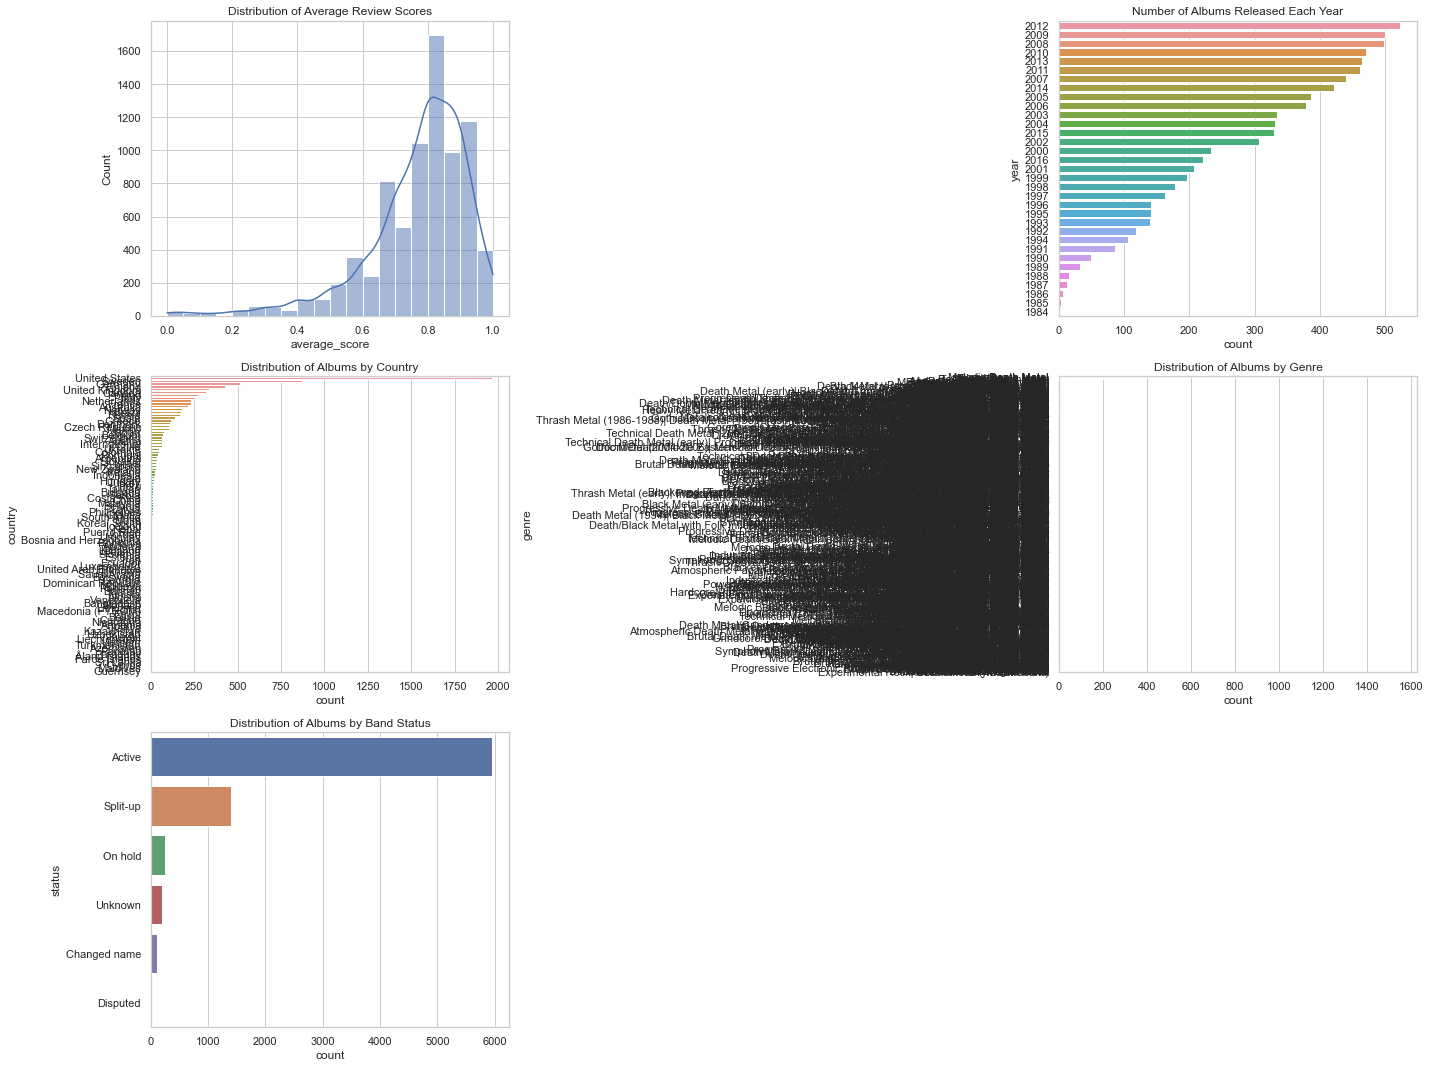

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create subplots for different visualizations
plt.subplot(3, 2, 1)
# Distribution of the average review scores
sns.histplot(features_df['average_score'], bins=20, kde=True)
plt.title('Distribution of Average Review Scores')

plt.subplot(3, 2, 2)
# Number of albums released each year
sns.countplot(y=features_df['year'], order=features_df['year'].value_counts().index)
plt.title('Number of Albums Released Each Year')

plt.subplot(3, 2, 3)
# Distribution of albums by country
sns.countplot(y=features_df['country'], order=features_df['country'].value_counts().index)
plt.title('Distribution of Albums by Country')

plt.subplot(3, 2, 4)
# Distribution of albums by genre
sns.countplot(y=features_df['genre'], order=features_df['genre'].value_counts().index)
plt.title('Distribution of Albums by Genre')

plt.subplot(3, 2, 5)
# Distribution of albums by band status
sns.countplot(y=features_df['status'], order=features_df['status'].value_counts().index)
plt.title('Distribution of Albums by Band Status')

# Adjust layout
plt.tight_layout()

# Show the visualizations
plt.show()


In [10]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features to be one-hot encoded and features to be scaled
categorical_features = ['country', 'status', 'genre', 'theme']
numerical_features = ['year', 'formed_in', 'average_score']

# Define the preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Preprocess the features
features_preprocessed = preprocessor.fit_transform(features_df)

# The result is a sparse matrix, convert it to a dense matrix
features_preprocessed = features_preprocessed.todense()

# Display the first few rows of the preprocessed features
features_preprocessed[:5]


matrix([[0.4375    , 0.43589744, 0.88      , ..., 0.        , 0.        ,
         0.        ],
        [0.5625    , 0.43589744, 0.96      , ..., 0.        , 0.        ,
         0.        ],
        [0.71875   , 0.43589744, 0.83      , ..., 0.        , 0.        ,
         0.        ],
        [0.34375   , 0.5528561 , 0.8       , ..., 0.        , 0.        ,
         0.        ],
        [0.84375   , 0.71794872, 0.92      , ..., 0.        , 0.        ,
         0.        ]])

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity between albums
similarity_matrix = cosine_similarity(features_preprocessed)

# Convert the similarity matrix to a DataFrame for easier querying
similarity_df = pd.DataFrame(similarity_matrix, index=features_df['id_album'], columns=features_df['id_album'])

# Display the similarity matrix
similarity_df.head()


C:\Users\Professional\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


id_album,4,5,8,45,54,62,65,66,67,68,...,28011,28012,28013,28014,28016,28058,28061,28065,28066,28067
id_album,,,,,,,,,,,,,,,,,,,,,
4,1.000000,0.998249,0.992522,0.410086,0.623962,0.395068,0.605022,0.614619,0.617898,0.600088,...,0.348378,0.399716,0.369734,0.396780,0.398577,0.439349,0.438398,0.432563,0.433132,0.423084
5,0.998249,1.000000,0.996187,0.420075,0.639303,0.408173,0.612551,0.624456,0.629275,0.610571,...,0.356101,0.412528,0.382375,0.415180,0.408132,0.455934,0.455406,0.451137,0.452255,0.441980
8,0.992522,0.996187,1.000000,0.411717,0.643363,0.412880,0.609478,0.620740,0.626669,0.615510,...,0.355564,0.404651,0.385828,0.421424,0.394732,0.454473,0.455289,0.456604,0.458578,0.451528
45,0.410086,0.420075,0.411717,1.000000,0.436897,0.590204,0.401885,0.413538,0.417695,0.396481,...,0.129512,0.186750,0.152059,0.183341,0.189569,0.433425,0.432223,0.425531,0.425615,0.416322
54,0.623962,0.639303,0.643363,0.436897,1.000000,0.439699,0.621060,0.633704,0.640590,0.629064,...,0.362917,0.415223,0.396427,0.435777,0.406810,0.489191,0.490285,0.492607,0.494847,0.487863


In [12]:
# Define a function to get the top N recommended albums for a given album
def recommend_albums(album_id, num_recommendations=5):
    # Get the similarity scores for the given album
    similarity_scores = similarity_df.loc[album_id]
    
    # Sort the scores in descending order and get the top N album IDs
    recommended_albums = similarity_scores.sort_values(ascending=False).head(num_recommendations + 1).index
    
    # Exclude the given album itself from the recommendations
    recommended_albums = recommended_albums[recommended_albums != album_id]
    
    # Get the details of the recommended albums
    recommended_albums_df = features_df[features_df['id_album'].isin(recommended_albums)].set_index('id_album')
    
    return recommended_albums_df

# Choose an album for demonstration purposes
demo_album_id = features_df.iloc[0]['id_album']

# Get the top 5 recommended albums for the chosen album
num_recommendations = 5
recommended_albums_df = recommend_albums(demo_album_id, num_recommendations)

# Display the details of the chosen album and the recommended albums
chosen_album_details = features_df[features_df['id_album'] == demo_album_id]
chosen_album_details, recommended_albums_df


(   id_album      title_x  year  name    country  status  formed_in  \
 0         4  Inti Huacay  1998  1917  Argentina  Active     1994.0   
 
          genre                                              theme  \
 0  Death Metal  Dark Philosophical Poetry| Art| Religion| Psyc...   
 
    average_score  
 0           0.88  ,
                    title_x  year     name    country  status  formed_in  \
 id_album                                                                  
 5         Génesis & horror  2002     1917  Argentina  Active     1994.0   
 8                Vox Fatum  2007     1917  Argentina  Active     1994.0   
 4060           Impressions  2008    Prion  Argentina  Active     1994.0   
 5246              Diseased  1995  Vibrion  Argentina  Active     1992.0   
 5247      Closed Frontiers  1997  Vibrion  Argentina  Active     1992.0   
 
                 genre                                              theme  \
 id_album                                                     